In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(caret)
library(ResourceSelection)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: lattice



Warning message:
"package 'ResourceSelection' was built under R version 4.3.3"
ResourceSelection 0.3-6 	 2023-06-27



In [2]:
# Load the data
fraud_data <- read.csv("Datasets/fraud.csv")

head(fraud_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-0.6980436,-0.04419812,1.6811673,0.9745233,-0.245692619,0.34715606,0.19516625,0.08370937,0.3320762,⋯,-0.02528877,0.38346201,-0.17712600,0.1105104,0.2466123,-0.3923114,0.33748690,-0.06418093,149.62,0
2,0,0.6118281,0.16162642,0.1103481,0.3168994,0.043585540,-0.06183566,-0.06418938,0.07217789,-0.2331601,⋯,-0.31188331,-0.88147339,0.16239800,-0.5611484,0.3207289,0.2611633,-0.02269927,0.04488712,2.69,0
3,1,-0.6972977,-0.81384628,1.1753368,0.2685503,-0.365428546,1.35179670,0.64468863,0.21006306,-1.3826241,⋯,0.34258177,1.06504576,1.45808689,-1.1381284,-0.6286053,-0.2885504,-0.13987025,-0.18215547,378.66,0
4,1,-0.4960260,-0.11248295,1.1884502,-0.6104519,-0.007486433,0.93638751,0.19354560,0.32011743,-1.2661192,⋯,-0.14960499,0.00727844,-0.30514637,-1.9410890,1.2420391,-0.4603827,0.15849354,0.18735562,123.50,0
5,2,-0.5945675,0.53302677,1.0265370,0.2849940,-0.295708736,0.07201686,0.48298296,-0.22944885,0.7464582,⋯,-0.01302746,1.10175693,-0.22039050,0.2332575,-0.3952447,1.0419856,0.55445514,0.65590152,69.99,0
6,2,-0.2186654,0.58330073,0.7563618,-0.1189747,0.305725744,-0.02231914,0.38789196,0.22078229,-0.5191011,⋯,-0.28767899,-0.77265121,-0.04232414,-0.6132929,-0.4466323,0.2197161,0.64143563,0.24717586,3.67,0


In [3]:
str(fraud_data)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

In [4]:
summary(fraud_data)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

In [5]:
fraud_data$Class <- as.factor(fraud_data$Class)

In [6]:
str(fraud_data)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

In [7]:
summary(fraud_data)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

## EDA

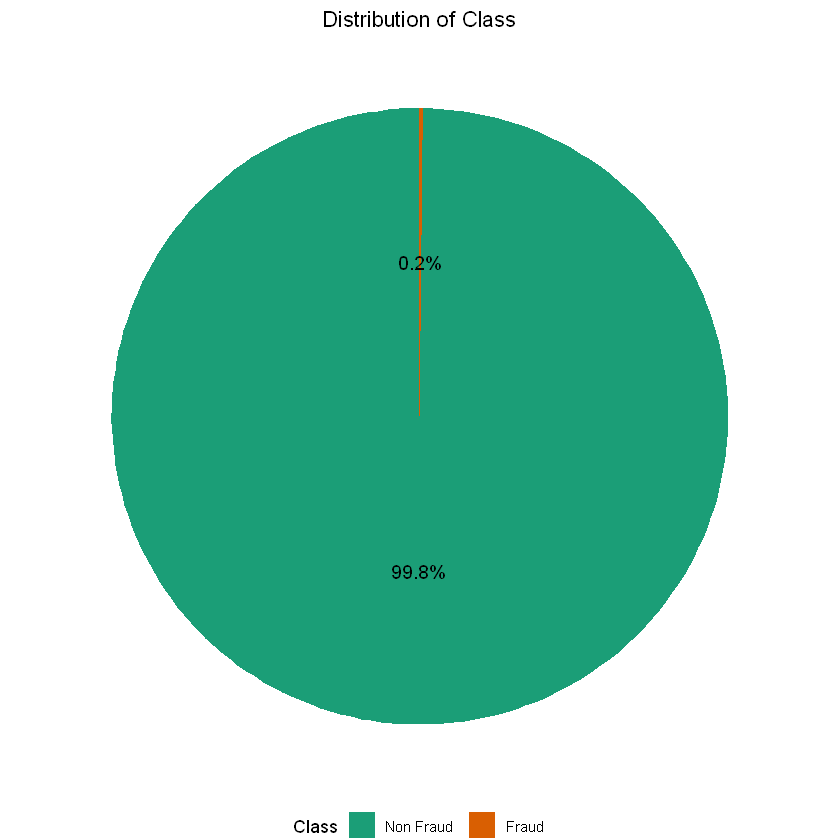

In [8]:
class_percentages <- prop.table(table(fraud_data$Class)) * 100

# Create a data frame for the pie chart
pie_data <- data.frame(Class = names(class_percentages), Percentage = as.vector(class_percentages))

# Create a pie chart
pie_chart <- ggplot(data = pie_data, aes(x = "", y = Percentage, fill = Class)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +  # Convert the bar plot to a pie chart
  labs(title = "Distribution of Class",
       fill = "Class",
       y = "Percentage") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 4) +  # Add percentage labels
  theme_void() +  # Remove axis and grid lines
  theme(legend.position = "bottom", plot.title = element_text(hjust = 0.5)) +  # Position the legend at the bottom and center the title
  scale_fill_manual(labels = c("Non Fraud", "Fraud"), values = c("#1b9e77", "#d95f02"))  # Set custom labels and colors

# Display the pie chart
print(pie_chart)

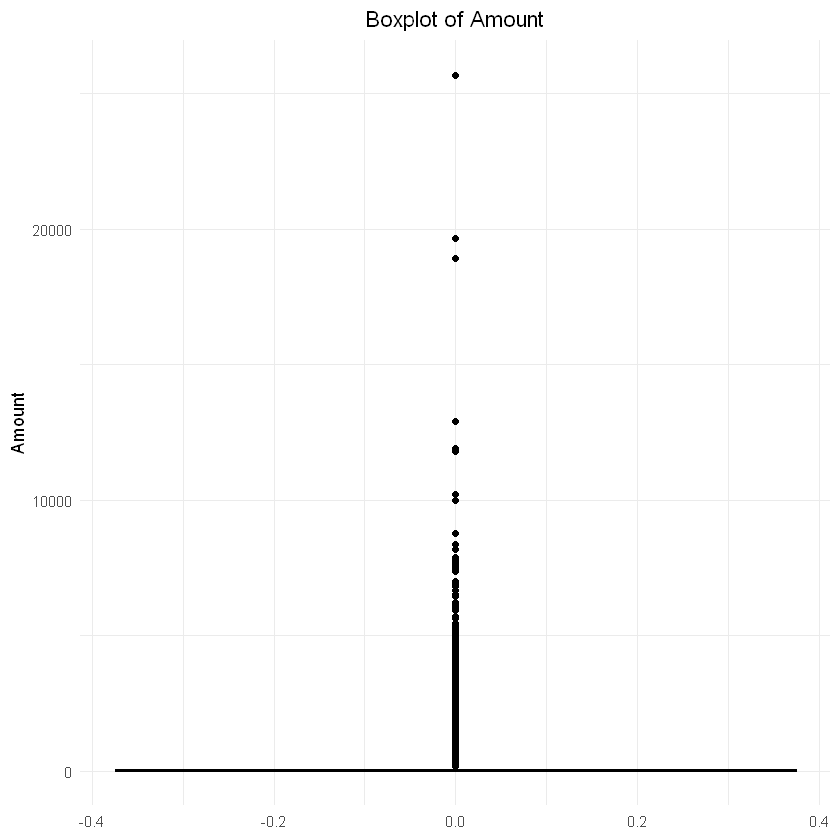

In [9]:
# Create a boxplot for the Amount variable
amount_boxplot <- ggplot(fraud_data, aes(y = Amount)) +
  geom_boxplot(fill = "#0072B2", color = "black") +
  labs(title = "Boxplot of Amount",
       y = "Amount") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Display the boxplot
print(amount_boxplot)


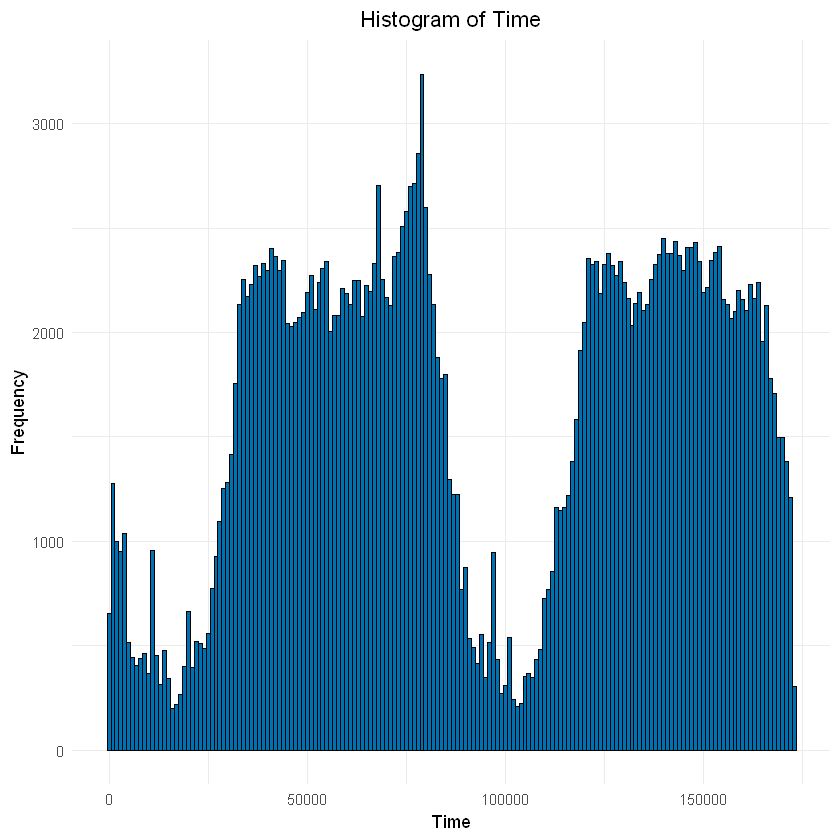

In [10]:
# Create a histogram for the Time variable
time_histogram <- ggplot(fraud_data, aes(x = Time)) +
  geom_histogram(binwidth = 1000, fill = "#0072B2", color = "black") +
  labs(title = "Histogram of Time",
       x = "Time",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Display the histogram
print(time_histogram)

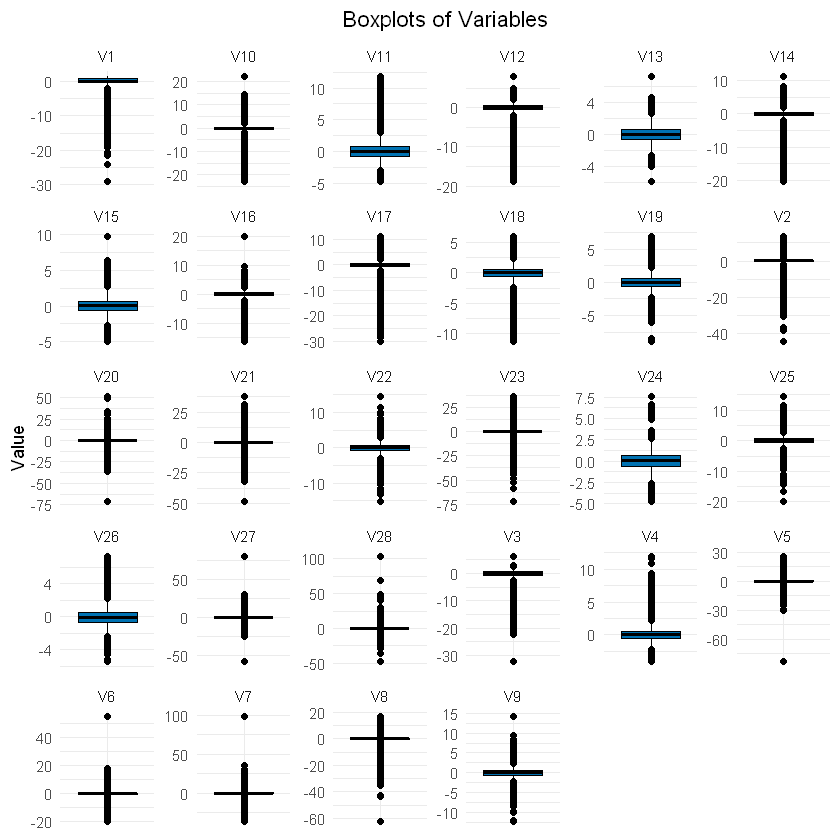

In [11]:
# Reshape the data to long format for boxplot
fraud_data_long <- fraud_data %>%
  select(-Time, -Class) %>%  # Exclude 'Time' and 'Class' columns
  pivot_longer(cols = -Amount, names_to = "Variable", values_to = "Value")

# Create separate boxplots for each variable
boxplots <- ggplot(fraud_data_long, aes(x = Variable, y = Value)) +
  geom_boxplot(fill = "#0072B2", color = "black") +
  labs(title = "Boxplots of Variables",
       x = NULL,  # Remove x-axis label
       y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),  # Remove x-axis labels
        strip.placement = "bottom",   # Place facet strip labels at the bottom
        plot.title = element_text(hjust = 0.5)) +  # Center title
  facet_wrap(~ Variable, scales = "free")  # Facet by variable with free scales

# Display the boxplots
print(boxplots)

## LOGISTIC REGRESSION

Model using all variables

In [12]:
fit1 <- glm(Class ~ ., data=fraud_data, family=binomial)
summary(fit1)


Call:
glm(formula = Class ~ ., family = binomial, data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.398e+00  2.499e-01 -33.602  < 2e-16 ***
Time        -3.676e-06  2.259e-06  -1.627 0.103644    
V1           1.873e-01  8.251e-02   2.270 0.023223 *  
V2           1.747e-02  9.585e-02   0.182 0.855338    
V3          -1.258e-02  8.012e-02  -0.157 0.875214    
V4           9.918e-01  1.046e-01   9.484  < 2e-16 ***
V5           1.797e-01  9.206e-02   1.952 0.050930 .  
V6          -1.651e-01  9.879e-02  -1.671 0.094654 .  
V7          -1.164e-01  8.192e-02  -1.421 0.155426    
V8          -2.082e-01  3.609e-02  -5.769 7.95e-09 ***
V9          -3.095e-01  1.213e-01  -2.551 0.010746 *  
V10         -8.859e-01  1.043e-01  -8.497  < 2e-16 ***
V11         -5.899e-02  8.292e-02  -0.711 0.476836    
V12          8.268e-02  8.653e-02   0.955 0.339352    
V13         -3.242e-01  8.133e-02  -3.986 6.71e-05 ***
V14         -5.215e-01  5.936e-02  

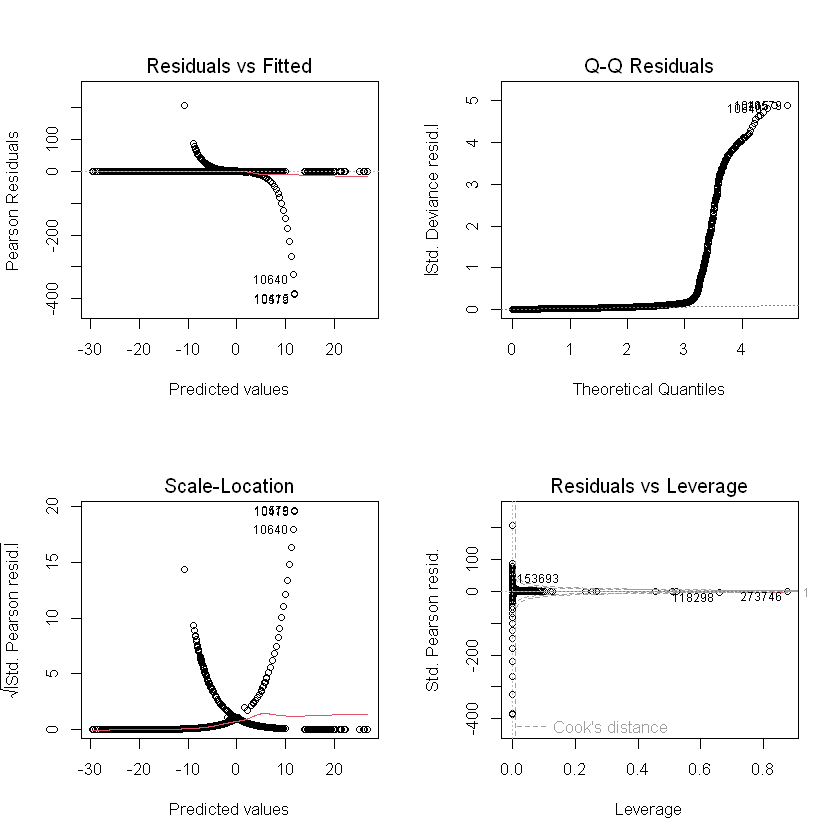

In [13]:
par(mfrow=c(2,2))
plot(fit1)

In [14]:
actual <- fraud_data$Class
predicted <- round(fitted(fit1))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 283211     42
     1    184    289

In [15]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.999

Removing V2, V3, V17, V18, V25, V26

In [16]:
fit2 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=fraud_data, family=binomial)
summary(fit2)


Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.421e+00  2.118e-01 -39.751  < 2e-16 ***
Time        -3.400e-06  1.893e-06  -1.795 0.072576 .  
V1           1.911e-01  7.527e-02   2.539 0.011108 *  
V4           9.837e-01  9.384e-02  10.484  < 2e-16 ***
V5           1.612e-01  5.587e-02   2.885 0.003917 ** 
V6          -1.640e-01  9.359e-02  -1.753 0.079652 .  
V7          -1.294e-01  7.282e-02  -1.777 0.075591 .  
V8          -2.092e-01  3.513e-02  -5.956 2.58e-09 ***
V9          -3.239e-01  9.602e-02  -3.373 0.000743 ***
V10         -8.791e-01  9.765e-02  -9.003  < 2e-16 ***
V11         -5.596e-02  7.779e-02  -0.719 0.471909    
V12          6.915e-02  7.299e-02   0.947 0.343457    
V13         -3.191e-01  7.981e-02  -3.999 6.37e-05 ***
V14         -5.215e-01  5.714e-02  -9.127  < 2e-16 ***
V15         -1.092e-01  7.586e-02  -1.440 0.149847 

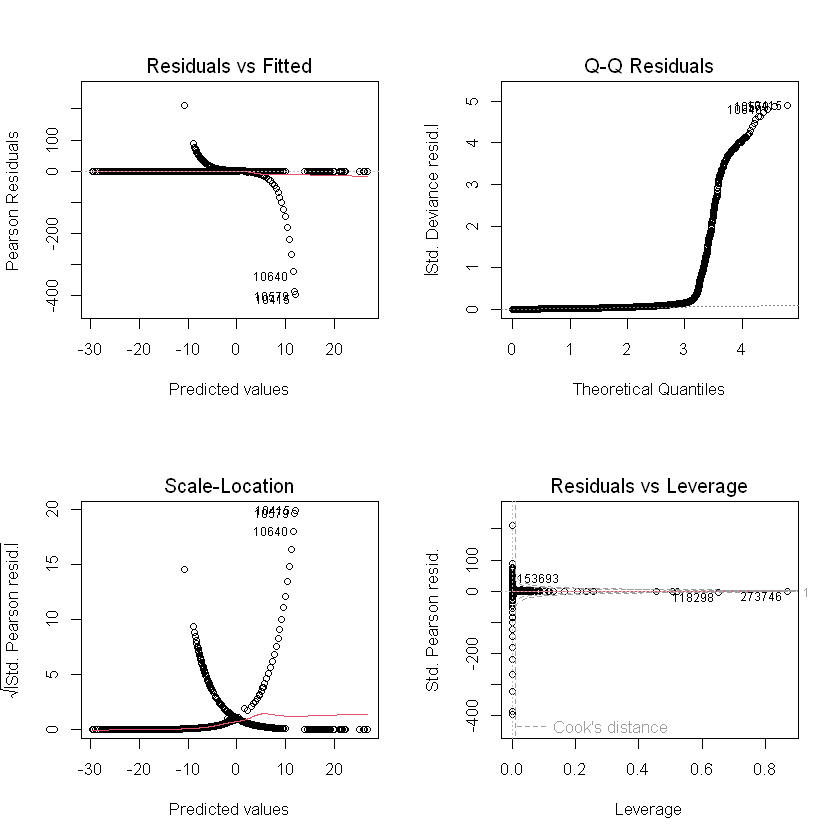

In [17]:
par(mfrow=c(2,2))
plot(fit2)

In [18]:
actual <- fraud_data$Class
predicted <- round(fitted(fit2))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 283211     42
     1    184    289

In [19]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.999

Removing V2, V3, V6, V7, V9, V11, V12, V15, V19, V24

In [20]:
fit3 <- glm(Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V19 - V24, data=fraud_data, family = "binomial")
summary(fit3)


Call:
glm(formula = Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - 
    V15 - V19 - V24, family = "binomial", data = fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.516e+00  2.086e-01 -40.818  < 2e-16 ***
Time        -1.550e-06  1.769e-06  -0.876 0.380953    
V1           7.786e-02  4.986e-02   1.561 0.118407    
V4           1.061e+00  8.235e-02  12.887  < 2e-16 ***
V5           1.719e-01  4.565e-02   3.766 0.000166 ***
V8          -2.001e-01  2.672e-02  -7.489 6.96e-14 ***
V10         -9.032e-01  9.905e-02  -9.118  < 2e-16 ***
V13         -3.228e-01  7.691e-02  -4.197 2.71e-05 ***
V14         -4.889e-01  5.328e-02  -9.177  < 2e-16 ***
V16         -1.883e-01  9.108e-02  -2.067 0.038694 *  
V17         -3.261e-02  4.506e-02  -0.724 0.469247    
V18          2.001e-02  9.632e-02   0.208 0.835437    
V20         -2.028e-01  4.445e-02  -4.563 5.05e-06 ***
V21          2.792e-01  4.265e-02   6.546 5.90e-11 ***
V22          4.254e-01  9.60

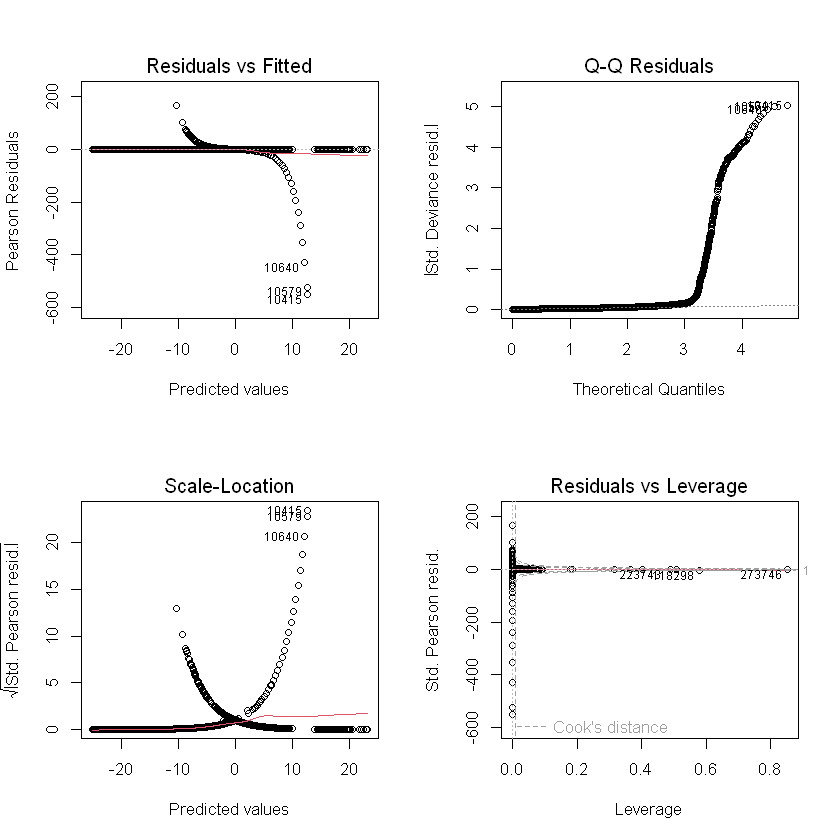

In [21]:
par(mfrow=c(2,2))
plot(fit3)

In [22]:
actual <- fraud_data$Class
predicted <- round(fitted(fit3))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 283213     40
     1    189    284

In [23]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.999

Removing V1, V2, V3, V6, V7, V9, V11, V12, V16, V17, V18, V19, V24, V25, V26, Amount and Time

In [24]:
fit4 <- glm(Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - V26 , data=fraud_data, family = "binomial")
summary(fit4)


Call:
glm(formula = Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - 
    V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - 
    V26, family = "binomial", data = fraud_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.62994    0.13035 -66.206  < 2e-16 ***
V4           1.00402    0.06515  15.412  < 2e-16 ***
V5           0.14488    0.03832   3.781 0.000156 ***
V8          -0.20651    0.02294  -9.002  < 2e-16 ***
V10         -0.82076    0.08626  -9.515  < 2e-16 ***
V13         -0.32098    0.07606  -4.220 2.44e-05 ***
V14         -0.52822    0.04525 -11.672  < 2e-16 ***
V16         -0.20405    0.04883  -4.178 2.94e-05 ***
V20         -0.15687    0.03471  -4.519 6.21e-06 ***
V21          0.28044    0.03882   7.225 5.03e-13 ***
V22          0.44918    0.08723   5.150 2.61e-07 ***
V23         -0.07238    0.02925  -2.474 0.013354 *  
V27         -0.19145    0.04480  -4.273 1.93e-05 ***
V28         -0.06489    0.02782  -2.332 0.019682 *  
---
Sign

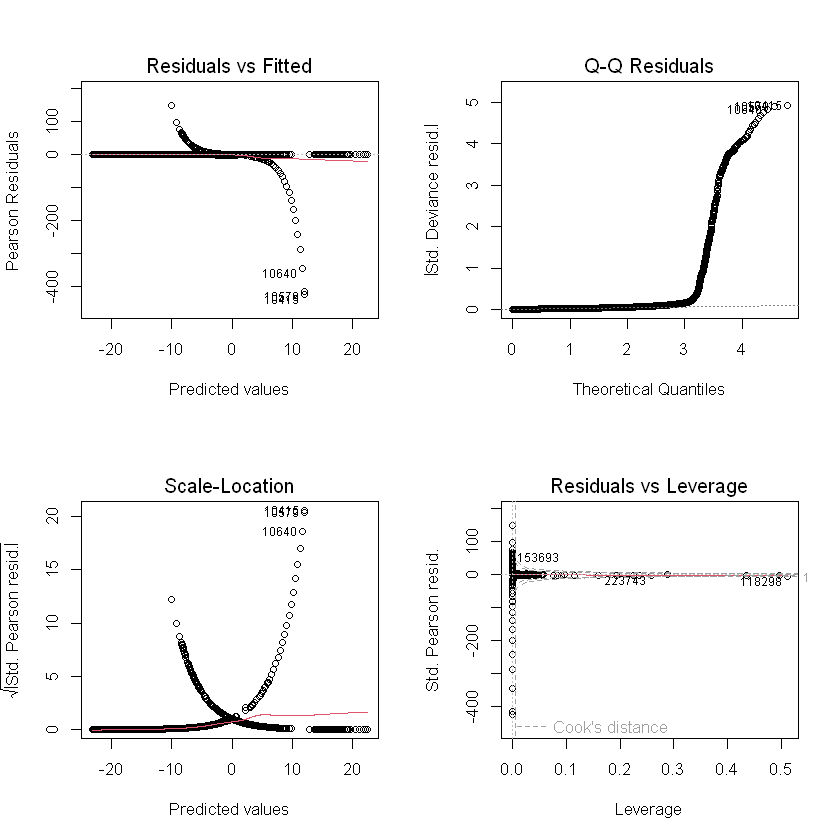

In [25]:
par(mfrow=c(2,2))
plot(fit4)

In [26]:
actual <- fraud_data$Class
predicted <- round(fitted(fit4))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 283212     41
     1    188    285

In [27]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.999

THE ACCURACY WILL ALWAYS BE AROUND 99% SO NOW DATA IMBALANCE NEEDS TO BE HANDELED

UPSAMPLING

In [28]:
up_fraud_data <- upSample(x=fraud_data[,-ncol(fraud_data)], y=fraud_data$Class)
up_fraud_data$Class <- as.factor(up_fraud_data$Class)

In [29]:
summary(up_fraud_data$Class)

0      1 
283253 283253

In [30]:
fit5 <- glm(Class ~ ., data=up_fraud_data, family=binomial)
summary(fit5)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = binomial, data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.427e+00  3.339e-02 -102.649  < 2e-16 ***
Time        -8.238e-06  2.128e-07  -38.709  < 2e-16 ***
V1           1.282e+00  2.938e-02   43.617  < 2e-16 ***
V2           9.827e-01  3.684e-02   26.676  < 2e-16 ***
V3           4.185e-01  1.788e-02   23.403  < 2e-16 ***
V4           1.071e+00  1.011e-02  105.848  < 2e-16 ***
V5           1.053e+00  2.410e-02   43.701  < 2e-16 ***
V6          -7.115e-01  1.528e-02  -46.557  < 2e-16 ***
V7          -6.721e-01  2.625e-02  -25.605  < 2e-16 ***
V8          -4.925e-01  8.740e-03  -56.346  < 2e-16 ***
V9          -3.279e-01  1.103e-02  -29.738  < 2e-16 ***
V10         -7.502e-01  1.474e-02  -50.908  < 2e-16 ***
V11          4.875e-01  9.885e-03   49.319  < 2e-16 ***
V12         -1.038e+00  1.406e-02  -73.818  < 2e-16 ***
V13         -3.716e-01  6.728e-03  -55.236  < 2e-16 ***
V14         -1.3

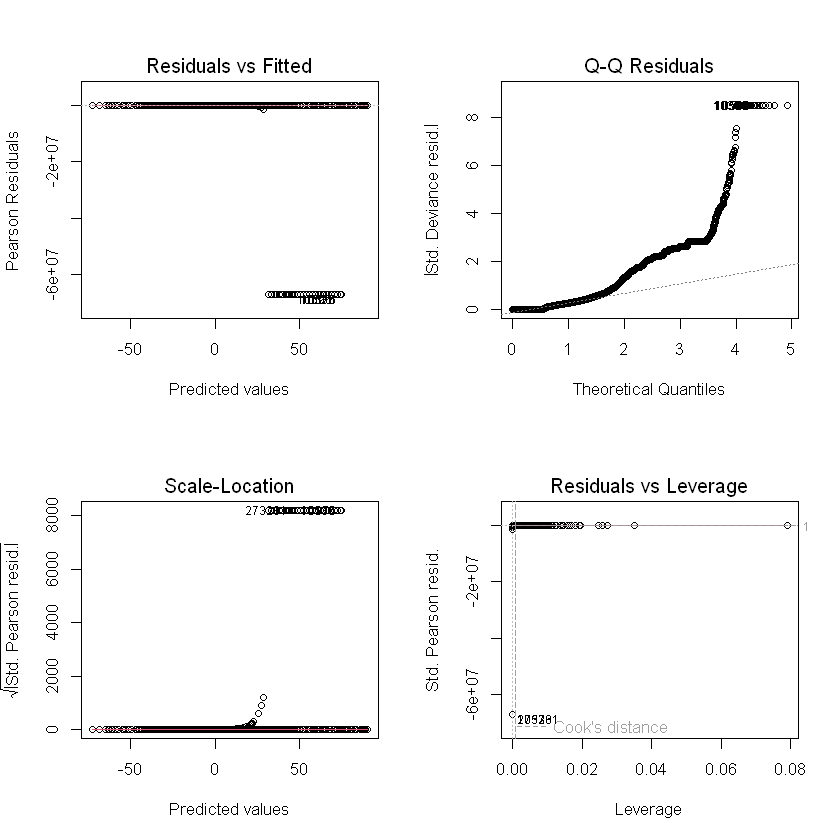

In [31]:
par(mfrow=c(2,2))
plot(fit5)

In [32]:
actual <- up_fraud_data$Class
predicted <- round(fitted(fit5))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 276708   6545
     1  23257 259996

In [33]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.947

In [34]:
fit6 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=up_fraud_data, family=binomial)
summary(fit6)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.874e+00  1.700e-02 -168.987  < 2e-16 ***
Time        -5.915e-06  1.663e-07  -35.575  < 2e-16 ***
V1           2.934e-01  8.626e-03   34.014  < 2e-16 ***
V4           1.134e+00  7.614e-03  148.930  < 2e-16 ***
V5           2.322e-01  6.934e-03   33.487  < 2e-16 ***
V6          -4.299e-01  9.493e-03  -45.289  < 2e-16 ***
V7           3.045e-03  8.071e-03    0.377 0.706003    
V8          -4.146e-01  5.746e-03  -72.149  < 2e-16 ***
V9          -2.777e-01  8.742e-03  -31.767  < 2e-16 ***
V10         -5.320e-01  9.952e-03  -53.454  < 2e-16 ***
V11          2.695e-01  6.863e-03   39.272  < 2e-16 ***
V12         -6.539e-01  7.248e-03  -90.208  < 2e-16 ***
V13         -3.178e-01  6.409e-03  -49.583  < 2e-16 ***
V14         -8.040e-01  6.506e-03 -123.585  < 2e-16 ***
V15         -1.282e-01  6.619e-03

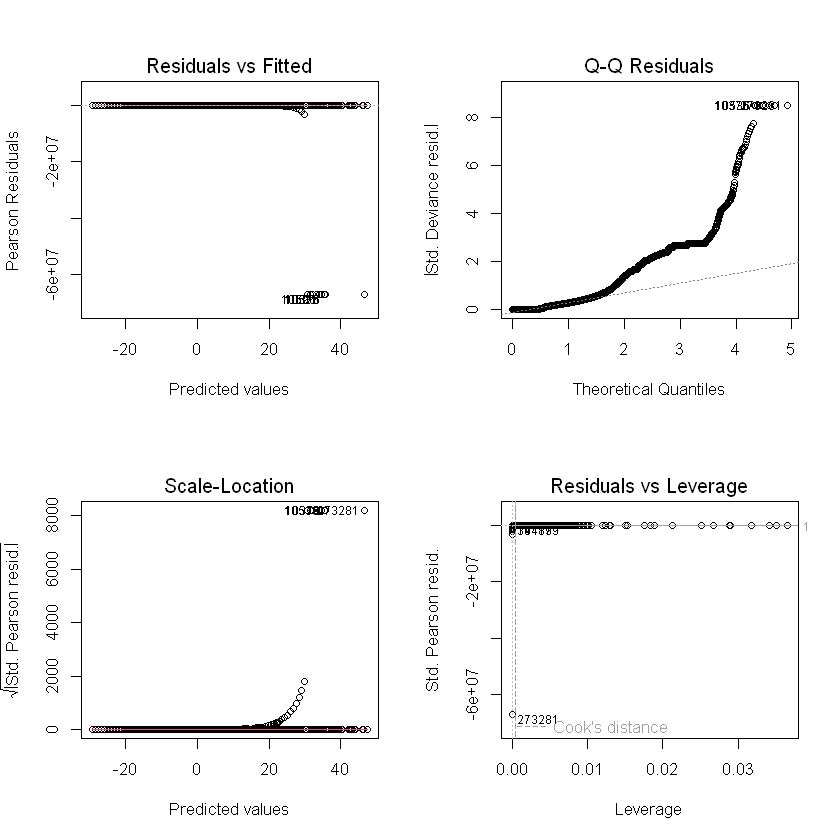

In [35]:
par(mfrow=c(2,2))
plot(fit6)

In [36]:
actual <- up_fraud_data$Class
predicted <- round(fitted(fit6))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 276064   7189
     1  23832 259421

In [37]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.945

In [38]:
fit7 <- glm(Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V19 - V24, data=up_fraud_data, family = "binomial")
summary(fit7)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - 
    V15 - V19 - V24, family = "binomial", data = up_fraud_data)

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.709e+00  1.634e-02 -165.777  < 2e-16 ***
Time        -7.081e-06  1.516e-07  -46.691  < 2e-16 ***
V1           1.540e-01  6.374e-03   24.155  < 2e-16 ***
V4           1.387e+00  7.802e-03  177.828  < 2e-16 ***
V5           3.646e-01  6.139e-03   59.390  < 2e-16 ***
V8          -3.052e-01  5.064e-03  -60.263  < 2e-16 ***
V10         -8.102e-01  1.069e-02  -75.777  < 2e-16 ***
V13         -3.168e-01  6.311e-03  -50.202  < 2e-16 ***
V14         -7.881e-01  6.726e-03 -117.179  < 2e-16 ***
V16         -2.655e-01  7.663e-03  -34.651  < 2e-16 ***
V17         -1.967e-01  5.982e-03  -32.878  < 2e-16 ***
V18          8.097e-02  8.121e-03    9.970  < 2e-16 ***
V20         -2.735e-01  6.961e-03  -39.286  < 2e-16 ***
V21          1.386e-01  5.114e-03   27.103  < 2e-16 ***
V22       

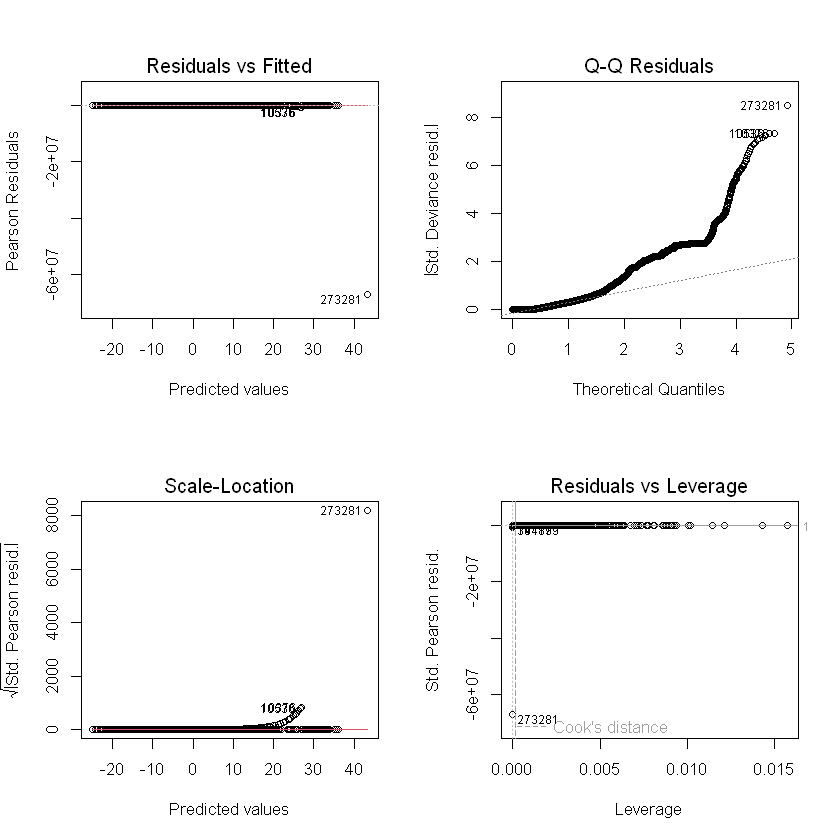

In [39]:
par(mfrow=c(2,2))
plot(fit7)

In [40]:
actual <- up_fraud_data$Class
predicted <- round(fitted(fit7))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 276166   7087
     1  25076 258177

In [41]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.943

In [42]:
fit8 <- glm(Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - V26, data=up_fraud_data, family = "binomial")
summary(fit8)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - 
    V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - 
    V26, family = "binomial", data = up_fraud_data)

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.127819   0.009994 -312.967   <2e-16 ***
V4           1.368433   0.006886  198.728   <2e-16 ***
V5           0.181826   0.005217   34.852   <2e-16 ***
V8          -0.359750   0.004878  -73.754   <2e-16 ***
V10         -0.725735   0.008964  -80.963   <2e-16 ***
V13         -0.329252   0.006186  -53.225   <2e-16 ***
V14         -0.708954   0.005729 -123.747   <2e-16 ***
V16         -0.247479   0.006141  -40.297   <2e-16 ***
V20         -0.101497   0.005506  -18.434   <2e-16 ***
V21          0.156223   0.005079   30.762   <2e-16 ***
V22          0.258613   0.006584   39.276   <2e-16 ***
V23         -0.157249   0.003153  -49.876   <2e-16 ***
V27         -0.060721   0.005964  -10.182   <2e-16 ***
V28         -0.005679   0.0060

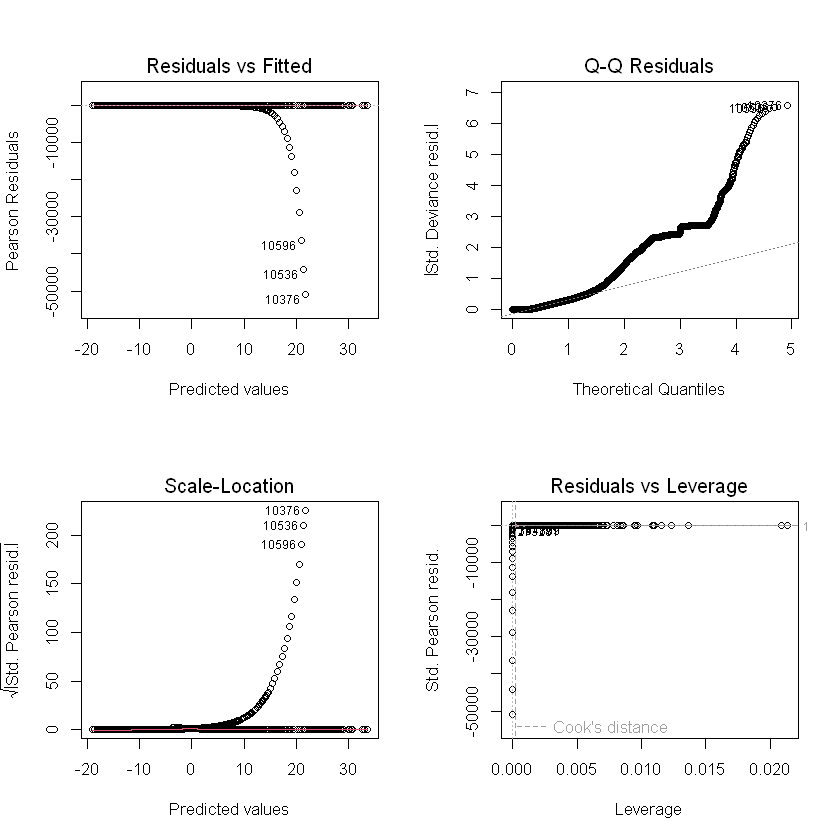

In [43]:
par(mfrow=c(2,2))
plot(fit8)

In [44]:
actual <- up_fraud_data$Class
predicted <- round(fitted(fit8))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual      0      1
     0 275110   8143
     1  26206 257047

In [45]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.939

DOWNSAMPLING

In [46]:
down_fraud_data <- downSample(x=fraud_data[,-ncol(fraud_data)], y=fraud_data$Class)
down_fraud_data$Class <- as.factor(down_fraud_data$Class)

In [47]:
summary(down_fraud_data$Class)

0   1 
473 473

In [48]:
fit9 <- glm(Class ~ ., data=down_fraud_data, family=binomial)
summary(fit9)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = binomial, data = down_fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -3.935e+01  2.163e+02  -0.182   0.8556   
Time        -1.904e-05  7.008e-06  -2.717   0.0066 **
V1          -7.169e+00  9.184e+01  -0.078   0.9378   
V2           1.265e+02  5.248e+02   0.241   0.8094   
V3          -8.119e+01  1.867e+02  -0.435   0.6636   
V4           5.359e+01  1.425e+02   0.376   0.7069   
V5          -2.361e+01  1.820e+01  -1.297   0.1946   
V6          -4.764e+01  1.930e+02  -0.247   0.8051   
V7          -1.686e+02  6.129e+02  -0.275   0.7832   
V8           3.006e+01  9.993e+01   0.301   0.7636   
V9          -5.364e+01  1.670e+02  -0.321   0.7481   
V10         -1.212e+02  3.773e+02  -0.321   0.7480   
V11          9.053e+01  3.030e+02   0.299   0.7651   
V12         -1.589e+02  5.314e+02  -0.299   0.7650   
V13         -2.602e+00  1.401e+01  -0.186   0.8527   
V14         -1.635e+02  5.552e+02  -0.294   0.

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


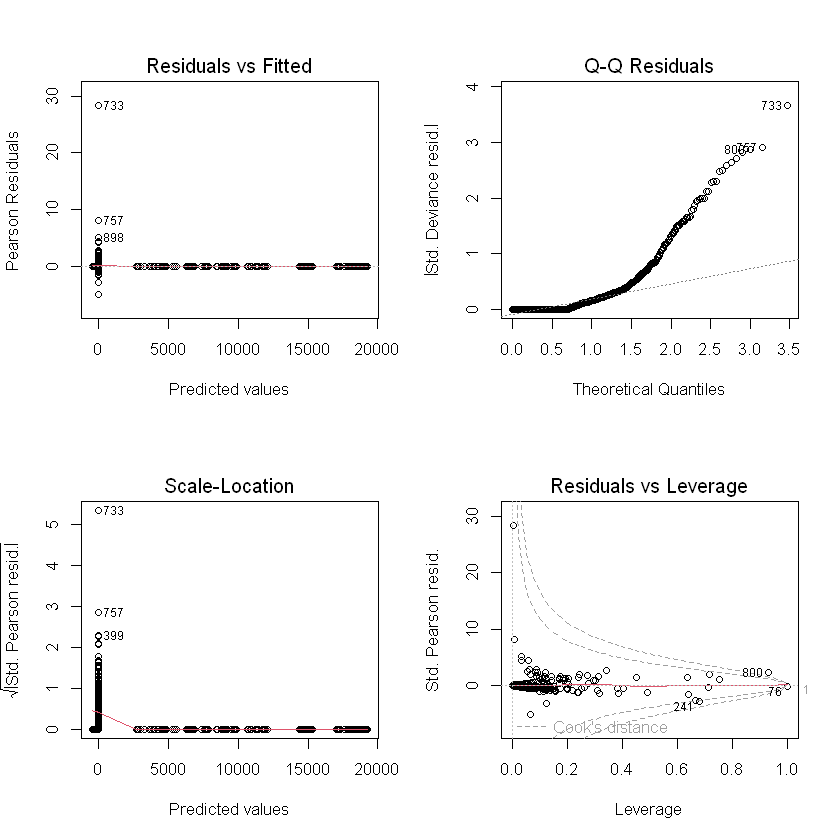

In [49]:
par(mfrow=c(2,2))
plot(fit9)

In [50]:
actual <- down_fraud_data$Class
predicted <- round(fitted(fit9))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 463  10
     1  30 443

In [51]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.958

In [52]:
fit10 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=down_fraud_data, family=binomial)
summary(fit10)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = down_fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.991e+00  4.504e-01  -6.642 3.10e-11 ***
Time        -6.912e-06  4.507e-06  -1.534 0.125082    
V1           6.194e-01  2.745e-01   2.257 0.024025 *  
V4           1.297e+00  2.102e-01   6.168 6.90e-10 ***
V5           4.440e-01  2.461e-01   1.804 0.071174 .  
V6          -4.364e-01  2.740e-01  -1.593 0.111181    
V7          -4.484e-01  2.584e-01  -1.735 0.082661 .  
V8          -5.803e-01  2.126e-01  -2.730 0.006343 ** 
V9          -3.996e-01  2.553e-01  -1.565 0.117467    
V10         -7.405e-01  3.313e-01  -2.235 0.025392 *  
V11          3.237e-01  1.848e-01   1.752 0.079735 .  
V12         -7.715e-01  2.092e-01  -3.687 0.000227 ***
V13         -4.231e-01  1.645e-01  -2.571 0.010131 *  
V14         -9.119e-01  1.987e-01  -4.589 4.45e-06 ***
V15         -2.494e-02  1.773e-01  -0.141 0.88

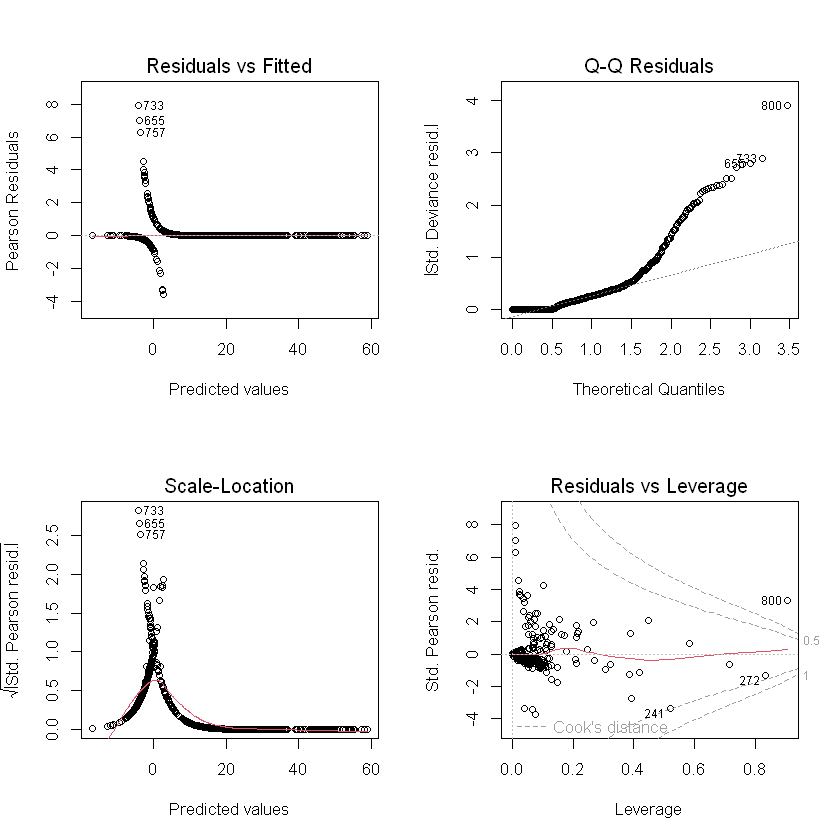

In [53]:
par(mfrow=c(2,2))
plot(fit10)

In [54]:
actual <- down_fraud_data$Class
predicted <- round(fitted(fit10))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 464   9
     1  38 435

In [55]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.95

In [56]:
fit11 <- glm(Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V19 - V24, data=down_fraud_data, family = "binomial")
summary(fit11)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V6 - V7 - V9 - V11 - V12 - 
    V15 - V19 - V24, family = "binomial", data = down_fraud_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.897e+00  4.087e-01  -7.089 1.35e-12 ***
Time        -5.990e-06  3.831e-06  -1.563  0.11796    
V1           1.109e-01  1.985e-01   0.559  0.57640    
V4           1.624e+00  2.152e-01   7.545 4.52e-14 ***
V5           4.175e-01  1.944e-01   2.147  0.03179 *  
V8          -5.376e-01  2.014e-01  -2.669  0.00762 ** 
V10         -9.818e-01  3.206e-01  -3.062  0.00220 ** 
V13         -4.855e-01  1.627e-01  -2.984  0.00285 ** 
V14         -8.548e-01  1.992e-01  -4.291 1.78e-05 ***
V16         -2.872e-01  1.962e-01  -1.463  0.14339    
V17         -1.814e-01  1.710e-01  -1.061  0.28868    
V18         -9.072e-02  2.173e-01  -0.418  0.67630    
V20         -3.155e-01  2.061e-01  -1.530  0.12590    
V21          1.748e-01  1.634e-01   1.070  0.28462    
V22          1.929e-01 

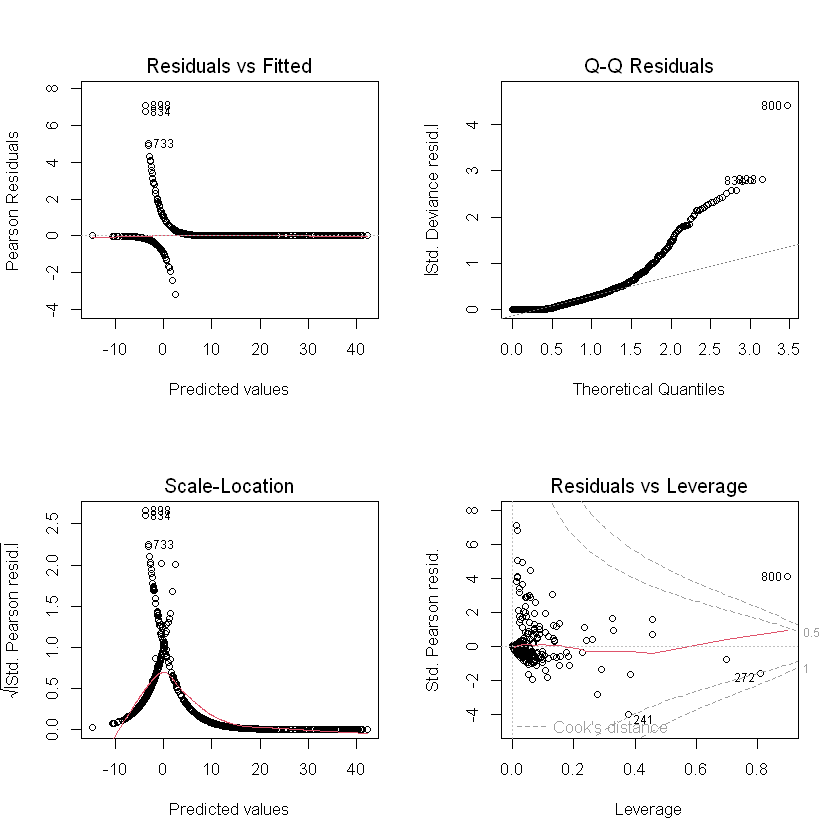

In [57]:
par(mfrow=c(2,2))
plot(fit11)

In [58]:
actual <- down_fraud_data$Class
predicted <- round(fitted(fit11))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 461  12
     1  41 432

In [59]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.944

In [60]:
fit12 <- glm(Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - V26 , data=down_fraud_data, family = "binomial")
summary(fit12)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - Amount - Time - V1 - V2 - V3 - V6 - 
    V7 - V9 - V11 - V12 - V15 - V17 - V18 - V19 - V24 - V25 - 
    V26, family = "binomial", data = down_fraud_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.28754    0.26298 -12.501  < 2e-16 ***
V4           1.59942    0.19172   8.343  < 2e-16 ***
V5           0.19822    0.13531   1.465 0.142949    
V8          -0.58121    0.15024  -3.868 0.000110 ***
V10         -0.87316    0.25803  -3.384 0.000715 ***
V13         -0.46660    0.15828  -2.948 0.003199 ** 
V14         -0.77582    0.16780  -4.624 3.77e-06 ***
V16         -0.26779    0.15541  -1.723 0.084876 .  
V20         -0.23686    0.15418  -1.536 0.124478    
V21          0.14692    0.14152   1.038 0.299205    
V22          0.12099    0.17404   0.695 0.486949    
V23         -0.10675    0.08527  -1.252 0.210627    
V27          0.03897    0.19504   0.200 0.841637    
V28          0.03296    0.17323   0.190 0.849106    
---

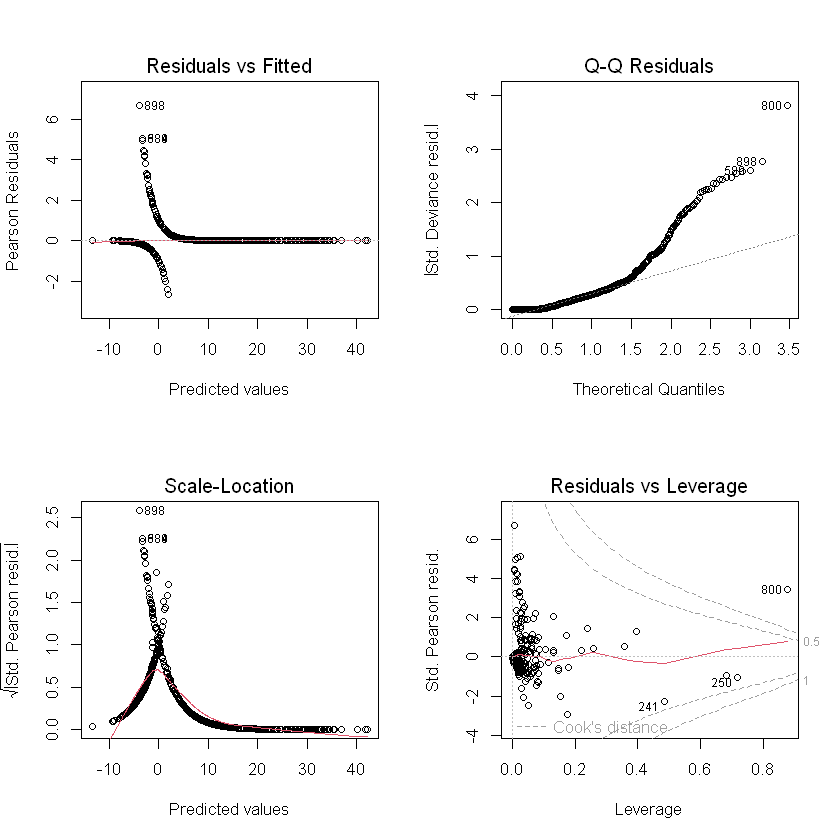

In [61]:
par(mfrow=c(2,2))
plot(fit12)

In [62]:
actual <- down_fraud_data$Class
predicted <- round(fitted(fit12))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 462  11
     1  41 432

In [63]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.945

## Hosmer-Lemeshow test

In [64]:
hoslem.test(fraud_data$Class, fitted(fit1))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fraud_data$Class, fitted(fit1)
X-squared = 283726, df = 8, p-value < 2.2e-16


In [65]:
hoslem.test(fraud_data$Class, fitted(fit2))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fraud_data$Class, fitted(fit2)
X-squared = 283726, df = 8, p-value < 2.2e-16


In [66]:
hoslem.test(fraud_data$Class, fitted(fit3))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fraud_data$Class, fitted(fit3)
X-squared = 283726, df = 8, p-value < 2.2e-16


In [67]:
hoslem.test(fraud_data$Class, fitted(fit4))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  fraud_data$Class, fitted(fit4)
X-squared = 283726, df = 8, p-value < 2.2e-16


In [68]:
hoslem.test(up_fraud_data$Class, fitted(fit5))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"
Warning message in hoslem.test(up_fraud_data$Class, fitted(fit5)):
"The data did not allow for the requested number of bins."



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  up_fraud_data$Class, fitted(fit5)
X-squared = 566506, df = 6, p-value < 2.2e-16


In [69]:
hoslem.test(up_fraud_data$Class, fitted(fit6))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  up_fraud_data$Class, fitted(fit6)
X-squared = 566506, df = 8, p-value < 2.2e-16


In [70]:
hoslem.test(up_fraud_data$Class, fitted(fit7))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  up_fraud_data$Class, fitted(fit7)
X-squared = 566506, df = 8, p-value < 2.2e-16


In [71]:
hoslem.test(up_fraud_data$Class, fitted(fit8))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  up_fraud_data$Class, fitted(fit8)
X-squared = 566506, df = 8, p-value < 2.2e-16


In [72]:
hoslem.test(down_fraud_data$Class, fitted(fit9))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"
Warning message in hoslem.test(down_fraud_data$Class, fitted(fit9)):
"The data did not allow for the requested number of bins."



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  down_fraud_data$Class, fitted(fit9)
X-squared = 946, df = 5, p-value < 2.2e-16


In [73]:
hoslem.test(down_fraud_data$Class, fitted(fit10))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"
Warning message in hoslem.test(down_fraud_data$Class, fitted(fit10)):
"The data did not allow for the requested number of bins."



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  down_fraud_data$Class, fitted(fit10)
X-squared = 946, df = 7, p-value < 2.2e-16


In [74]:
hoslem.test(down_fraud_data$Class, fitted(fit11))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  down_fraud_data$Class, fitted(fit11)
X-squared = 946, df = 8, p-value < 2.2e-16


In [75]:
hoslem.test(down_fraud_data$Class, fitted(fit12))

Warning message in Ops.factor(1, y):
"'-' not meaningful for factors"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  down_fraud_data$Class, fitted(fit12)
X-squared = 946, df = 8, p-value < 2.2e-16


## ODD'S RATIO

An odds ratio greater than 1 suggests that the odds of the outcome increase as the predictor variable increases.<br>
An odds ratio equal to 1 suggests that there is no association between the predictor variable and the outcome.<br>
An odds ratio less than 1 suggests that the odds of the outcome decrease as the predictor variable increases.<br>

In [76]:
coefficients <- coef(fit1)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V2          V3          V4 
 0.00022524  0.99999632  1.20594791  1.01762827  0.98749720  2.69614553 
         V5          V6          V7          V8          V9         V10 
 1.19687428  0.84779383  0.89013284  0.81203357  0.73379776  0.41232791 
        V11         V12         V13         V14         V15         V16 
 0.94271909  1.08619311  0.72310103  0.59361997  0.89544872  0.84029826 
        V17         V18         V19         V20         V21         V22 
 0.98836402  0.98846281  1.08345458  0.70086361  1.33048558  1.58728300 
        V23         V24         V25         V26         V27         V28 
 0.93832189  1.07482267  0.97399073  1.00456202  0.72103394  0.90708960 
     Amount 
 1.00092313 


In [77]:
coefficients <- coef(fit2)
odds_ratios <- exp(coefficients)
print(odds_ratios)

 (Intercept)         Time           V1           V4           V5           V6 
0.0002201623 0.9999966005 1.2106319840 2.6744188421 1.1748939001 0.8487044375 
          V7           V8           V9          V10          V11          V12 
0.8786323317 0.8112145635 0.7233432582 0.4151517065 0.9455766878 1.0715985203 
         V13          V14          V15          V16          V19          V20 
0.7267717144 0.5936145109 0.8965062678 0.8279635270 1.0796324388 0.6993962590 
         V21          V22          V23          V24          V27          V28 
1.3307523320 1.5909495759 0.9323771482 1.0754336175 0.7191408901 0.9047946423 
      Amount 
1.0009175768 


In [78]:
coefficients <- coef(fit3)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V8 
  0.0002003   0.9999985   1.0809714   2.8897178   1.1875712   0.8186369 
        V10         V13         V14         V16         V17         V18 
  0.4052795   0.7241256   0.6133054   0.8283616   0.9679166   1.0202108 
        V20         V21         V22         V23         V25         V26 
  0.8164341   1.3220834   1.5302738   0.9308117   1.0006868   1.0234767 
        V27         V28      Amount 
  0.7925998   0.9285003   1.0001490 


In [79]:
coefficients <- coef(fit4)
odds_ratios <- exp(coefficients)
print(odds_ratios)

 (Intercept)           V4           V5           V8          V10          V13 
0.0001786745 2.7292266566 1.1559053508 0.8134206216 0.4400966697 0.7254364243 
         V14          V16          V20          V21          V22          V23 
0.5896563778 0.8154206075 0.8548109649 1.3237184500 1.5670202844 0.9301813688 
         V27          V28 
0.8257646727 0.9371734623 


In [80]:
coefficients <- coef(fit5)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V2          V3          V4 
  0.0324694   0.9999918   3.6023224   2.6716874   1.5196369   2.9169246 
         V5          V6          V7          V8          V9         V10 
  2.8668249   0.4908938   0.5106511   0.6111061   0.7204068   0.4722955 
        V11         V12         V13         V14         V15         V16 
  1.6282535   0.3543334   0.6895963   0.2646274   0.8683237   0.5357485 
        V17         V18         V19         V20         V21         V22 
  0.4777323   0.7971126   1.2841376   0.5361691   1.0273388   1.7635450 
        V23         V24         V25         V26         V27         V28 
  1.3233711   0.9708688   1.0123653   0.8559583   1.0481339   1.2990894 
     Amount 
  1.0083654 


In [81]:
coefficients <- coef(fit6)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V6 
 0.05649604  0.99999409  1.34096952  3.10801075  1.26138253  0.65054168 
         V7          V8          V9         V10         V11         V12 
 1.00304936  0.66062948  0.75751296  0.58743662  1.30932118  0.52002875 
        V13         V14         V15         V16         V19         V20 
 0.72777131  0.44752151  0.87970895  0.70783473  1.02298839  0.79337706 
        V21         V22         V23         V24         V27         V28 
 1.12448928  1.53067879  0.93053867  0.96922822  1.04170248  1.05657323 
     Amount 
 1.00192058 


In [82]:
coefficients <- coef(fit7)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V8 
 0.06658655  0.99999292  1.16644947  4.00464651  1.43995371  0.73698984 
        V10         V13         V14         V16         V17         V18 
 0.44477750  0.72844405  0.45470003  0.76680997  0.82145252  1.08433935 
        V20         V21         V22         V23         V25         V26 
 0.76072761  1.14867860  1.37720458  0.88938872  0.92291318  0.89876267 
        V27         V28      Amount 
 0.96126973  1.02852169  1.00145075 


In [83]:
coefficients <- coef(fit8)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)          V4          V5          V8         V10         V13 
 0.04381325  3.92918945  1.19940574  0.69785060  0.48396889  0.71946146 
        V14         V16         V20         V21         V22         V23 
 0.49215868  0.78076647  0.90348360  1.16908716  1.29513209  0.85449109 
        V27         V28 
 0.94108585  0.99433707 


In [84]:
coefficients <- coef(fit9)
odds_ratios <- exp(coefficients)
print(odds_ratios)

 (Intercept)         Time           V1           V2           V3           V4 
8.155417e-18 9.999810e-01 7.697696e-04 9.059777e+54 5.467997e-36 1.887786e+23 
          V5           V6           V7           V8           V9          V10 
5.594560e-11 2.037105e-21 6.038394e-74 1.130600e+13 5.050635e-24 2.282943e-53 
         V11          V12          V13          V14          V15          V16 
2.070131e+39 9.941712e-70 7.415029e-02 1.026020e-71 8.752765e-03 1.372200e-58 
         V17          V18          V19          V20          V21          V22 
1.766093e-99 5.375322e-38 1.147024e+14 1.701357e-05 4.187347e+03 2.739950e+04 
         V23          V24          V25          V26          V27          V28 
2.165482e+10 8.877176e-02 1.683718e+04 7.267383e+00 7.864562e+03 9.183393e+06 
      Amount 
1.564805e+00 


In [85]:
coefficients <- coef(fit10)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V6 
 0.05021498  0.99999309  1.85783843  3.65782882  1.55892059  0.64634085 
         V7          V8          V9         V10         V11         V12 
 0.63862951  0.55971680  0.67059063  0.47688926  1.38228566  0.46231259 
        V13         V14         V15         V16         V19         V20 
 0.65502930  0.40177400  0.97536422  0.64779570  1.04684391  0.58284524 
        V21         V22         V23         V24         V27         V28 
 1.08466794  1.51084788  1.16909880  1.00312823  1.21310787  0.98704245 
     Amount 
 1.00341250 


In [86]:
coefficients <- coef(fit11)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)        Time          V1          V4          V5          V8 
 0.05516123  0.99999401  1.11725426  5.07234301  1.51814314  0.58416595 
        V10         V13         V14         V16         V17         V18 
 0.37462796  0.61539085  0.42537521  0.75039522  0.83411097  0.91327735 
        V20         V21         V22         V23         V25         V26 
 0.72945369  1.19105905  1.21271755  0.96535021  0.93691046  0.88068941 
        V27         V28      Amount 
 1.12744312  0.99792718  1.00091026 


In [87]:
coefficients <- coef(fit12)
odds_ratios <- exp(coefficients)
print(odds_ratios)

(Intercept)          V4          V5          V8         V10         V13 
 0.03734545  4.95015745  1.21922729  0.55922375  0.41762914  0.62712839 
        V14         V16         V20         V21         V22         V23 
 0.46032415  0.76507050  0.78910450  1.15826282  1.12860961  0.89875185 
        V27         V28 
 1.03973786  1.03350844 


SELECTING THE BEST MODEL BASED ON AIC

In [88]:
model_list <- list(fit1, fit2, fit3, fit4, fit5, fit6, fit7, fit8, fit9, fit10, fit11, fit12)

# Function to extract AIC from each model
extract_AIC <- function(model) {
  AIC_val <- AIC(model)
  return(AIC_val)
}

# Extract AIC values for each model
AIC_values <- sapply(model_list, extract_AIC)

# Print model names and corresponding AIC values
for (i in seq_along(model_list)) {
  cat(paste("Model:", paste("fit", i, sep = ""), "- AIC:", AIC_values[i], "\n"))
}

Model: fit1 - AIC: 2287.60691859998 
Model: fit2 - AIC: 2275.83528102652 
Model: fit3 - AIC: 2286.7044489212 
Model: fit4 - AIC: 2276.94560513537 
Model: fit5 - AIC: 155565.080049263 
Model: fit6 - AIC: 161071.427162149 
Model: fit7 - AIC: 174130.945369487 
Model: fit8 - AIC: 180146.875774923 
Model: fit9 - AIC: 254.525474972598 
Model: fit10 - AIC: 296.084830992916 
Model: fit11 - AIC: 312.169187284535 
Model: fit12 - AIC: 303.938333444786 


IMPROVING OVER FIT10 AS IT HAS THE LOWEST AIC

In [89]:
diagnostics_fit10 <- data.frame(Model = "fit10", 
                                 Cooks_Distance = NA,
                                 Leverage = NA,
                                 Std_Residuals = NA,
                                 DFBeta = NA)

model_fit10 <- fit10

# Cook's distance
cooks_dist_fit10 <- cooks.distance(model_fit10)
diagnostics_fit10$Cooks_Distance <- max(cooks_dist_fit10)

# Leverage
leverage_fit10 <- hatvalues(model_fit10)
diagnostics_fit10$Leverage <- max(leverage_fit10)

# Standardized residuals
std_res_fit10 <- rstandard(model_fit10)
diagnostics_fit10$Std_Residuals <- max(abs(std_res_fit10))

# DFBeta
df_beta_fit10 <- dfbetas(model_fit10)
diagnostics_fit10$DFBeta <- max(apply(abs(df_beta_fit10), 1, max))

diagnostics_fit10

Model,Cooks_Distance,Leverage,Std_Residuals,DFBeta
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
fit10,4.268253,0.9050837,3.90515,10.81067


In [90]:
down_fraud_data_1 <- down_fraud_data[-c(163, 399, 867),]

In [91]:
fit10_1 <- glm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=down_fraud_data_1, family=binomial)
summary(fit10_1)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, family = binomial, 
    data = down_fraud_data_1)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.026e+00  4.565e-01  -6.629 3.38e-11 ***
Time        -6.925e-06  4.551e-06  -1.522  0.12807    
V1           6.412e-01  2.820e-01   2.274  0.02299 *  
V4           1.327e+00  2.120e-01   6.257 3.94e-10 ***
V5           4.861e-01  2.392e-01   2.032  0.04213 *  
V6          -3.574e-01  2.613e-01  -1.368  0.17138    
V7          -4.152e-01  2.571e-01  -1.615  0.10628    
V8          -5.897e-01  2.107e-01  -2.798  0.00514 ** 
V9          -4.320e-01  2.599e-01  -1.662  0.09645 .  
V10         -8.271e-01  3.417e-01  -2.420  0.01550 *  
V11          3.089e-01  1.866e-01   1.656  0.09779 .  
V12         -9.260e-01  2.227e-01  -4.158 3.21e-05 ***
V13         -3.890e-01  1.659e-01  -2.345  0.01902 *  
V14         -9.939e-01  2.075e-01  -4.790 1.67e-06 ***
V15         -5.482e-02  1.782e-01  -0.308  0

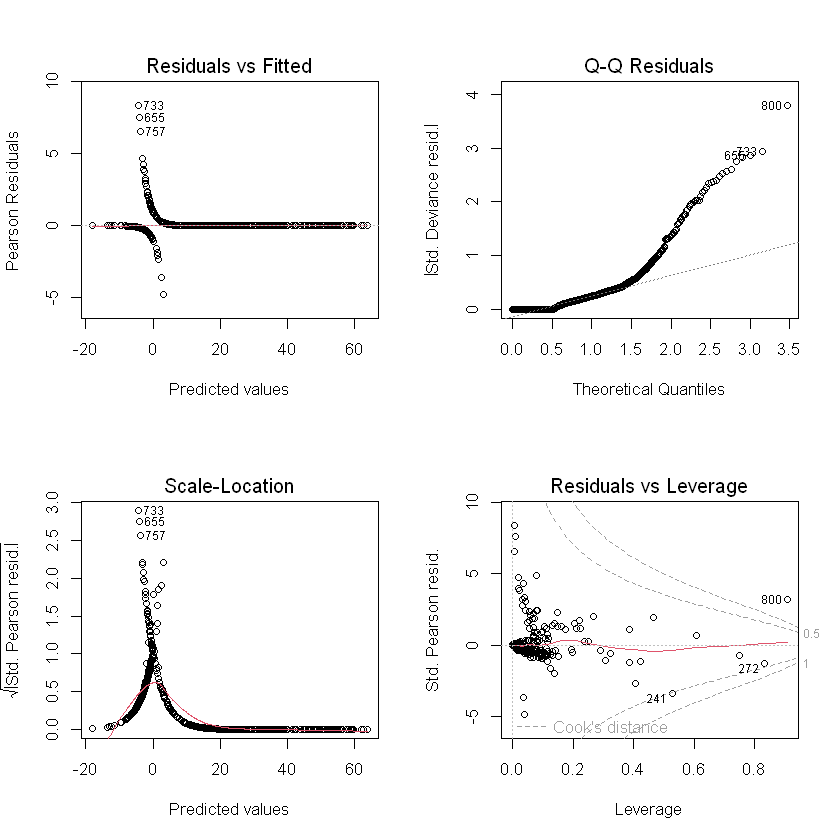

In [92]:
par(mfrow=c(2,2))
plot(fit10_1)

In [93]:
actual <- down_fraud_data_1$Class
predicted <- round(fitted(fit10_1))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual   0   1
     0 464   7
     1  38 434

In [94]:
accuracy <- sum(diag(xt))/sum(xt)
round(accuracy,3)

[1] 0.952

In [95]:
diagnostics_fit10_1 <- data.frame(Model = "fit10_1", 
                                 Cooks_Distance = NA,
                                 Leverage = NA,
                                 Std_Residuals = NA,
                                 DFBeta = NA)

model_fit10_1 <- fit10_1

# Cook's distance
cooks_dist_fit10_1 <- cooks.distance(model_fit10_1)
diagnostics_fit10_1$Cooks_Distance <- max(cooks_dist_fit10_1)

# Leverage
leverage_fit10_1 <- hatvalues(model_fit10_1)
diagnostics_fit10_1$Leverage <- max(leverage_fit10_1)

# Standardized residuals
std_res_fit10_1 <- rstandard(model_fit10_1)
diagnostics_fit10_1$Std_Residuals <- max(abs(std_res_fit10_1))

# DFBeta
df_beta_fit10_1 <- dfbetas(model_fit10_1)
diagnostics_fit10_1$DFBeta <- max(apply(abs(df_beta_fit10_1), 1, max))

diagnostics_fit10_1

Model,Cooks_Distance,Leverage,Std_Residuals,DFBeta
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
fit10_1,3.999078,0.9076197,3.787823,10.89884


## Coefficients fit10_1

In [96]:
print(round(coef(fit10_1),4))

(Intercept)        Time          V1          V4          V5          V6 
    -3.0259      0.0000      0.6412      1.3267      0.4861     -0.3574 
         V7          V8          V9         V10         V11         V12 
    -0.4152     -0.5897     -0.4320     -0.8271      0.3089     -0.9260 
        V13         V14         V15         V16         V19         V20 
    -0.3890     -0.9939     -0.0548     -0.4277      0.0443     -0.5217 
        V21         V22         V23         V24         V27         V28 
     0.0588      0.3818      0.1260      0.0299      0.1532      0.0077 
     Amount 
     0.0033 


In [97]:
confint(fit10_1)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

,2.5 %,97.5 %
(Intercept),-3.976157e+00,-2.178564e+00
Time,-1.608855e-05,1.846295e-06
V1,1.167854e-01,1.229117e+00
V4,9.374358e-01,1.773249e+00
V5,2.434732e-02,9.704383e-01
V6,-9.359619e-01,9.771881e-02
V7,-9.412727e-01,7.282827e-02
V8,-1.015297e+00,-1.841627e-01
V9,-9.647462e-01,5.628149e-02
V10,-1.546689e+00,-2.327735e-01


In [98]:
cbind(coef(fit10_1), confint(fit10_1, level=0.99))

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

,,0.5 %,99.5 %
(Intercept),-3.025918e+00,-4.299886e+00,-1.929719e+00
Time,-6.925134e-06,-1.909294e-05,4.567270e-06
V1,6.411901e-01,-3.862303e-02,1.430081e+00
V4,1.326680e+00,8.248594e-01,1.927616e+00
V5,4.860934e-01,-1.200721e-01,1.129830e+00
V6,-3.573795e-01,-1.142463e+00,2.230626e-01
V7,-4.152390e-01,-1.117883e+00,2.213456e-01
V8,-5.897131e-01,-1.156815e+00,-6.481892e-02
V9,-4.320368e-01,-1.142257e+00,2.024661e-01
V10,-8.271249e-01,-1.791604e+00,-8.481254e-02


## Linear Prediction

In [102]:
down_fraud_data_1$Class <- as.numeric(down_fraud_data_1$Class)

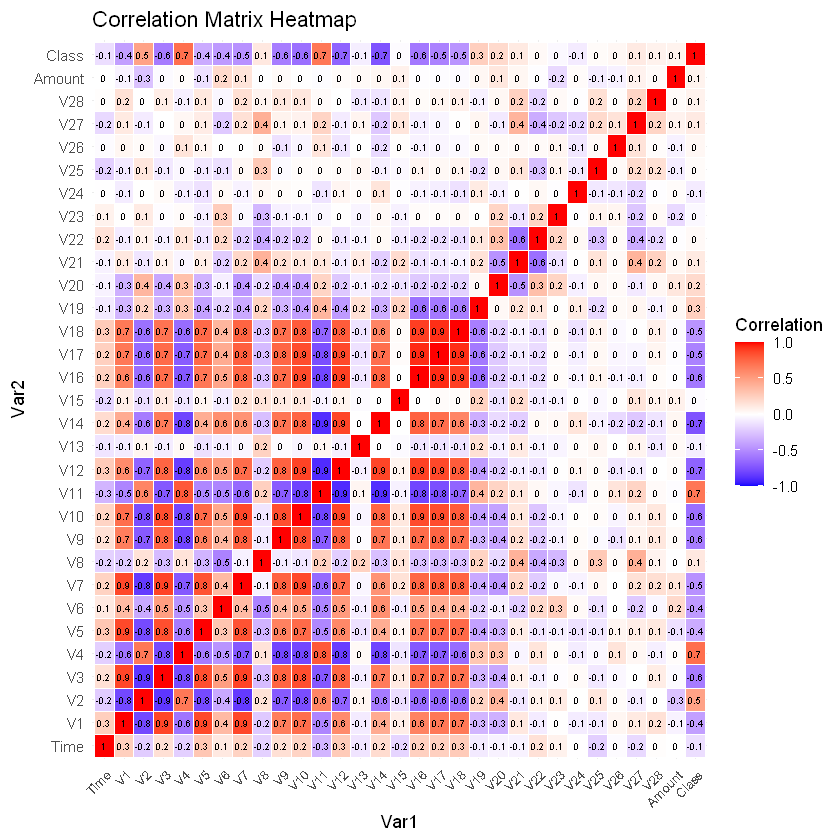

In [107]:
# Load necessary libraries
library(ggplot2)
library(reshape2)

# Create heatmap with annotations rounded to 1 decimal place and font size adjusted
heatmap_with_numbers <- ggplot(melted_correlation, aes(Var1, Var2, fill = value, label = round(value, 1))) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name = "Correlation") +
  geom_text(color = "black", size = 2) +  # Adjust font size
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 8, hjust = 1)) +
  labs(title = "Correlation Matrix Heatmap")

# Print the heatmap with annotations rounded to 1 decimal place and adjusted font size
print(heatmap_with_numbers)

In [110]:
fit10_1_lm <- lm(Class ~ . - V2 - V3 - V4 -V7 - V8 - V9 - V10 -V11 - V12 - V14 -V16 - V17 - V18 - V25 - V26, data=down_fraud_data_1)
summary(fit10_1_lm)


Call:
lm(formula = Class ~ . - V2 - V3 - V4 - V7 - V8 - V9 - V10 - 
    V11 - V12 - V14 - V16 - V17 - V18 - V25 - V26, data = down_fraud_data_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2161 -0.3352 -0.1006  0.3440  0.9532 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.373e+00  3.137e-02  43.754  < 2e-16 ***
Time        -9.098e-07  3.003e-07  -3.030 0.002514 ** 
V1          -6.008e-02  1.025e-02  -5.860 6.42e-09 ***
V5           1.834e-02  9.771e-03   1.877 0.060863 .  
V6          -1.464e-01  1.338e-02 -10.944  < 2e-16 ***
V13         -6.752e-02  1.280e-02  -5.274 1.66e-07 ***
V15         -4.543e-02  1.332e-02  -3.411 0.000676 ***
V19          3.585e-02  1.033e-02   3.472 0.000541 ***
V20          1.744e-02  1.255e-02   1.389 0.165047    
V21          3.290e-02  7.441e-03   4.421 1.10e-05 ***
V22          6.661e-02  1.376e-02   4.840 1.52e-06 ***
V23          1.867e-02  8.693e-03   2.147 0.032025 *  
V24         -5.224e-02  1.459e

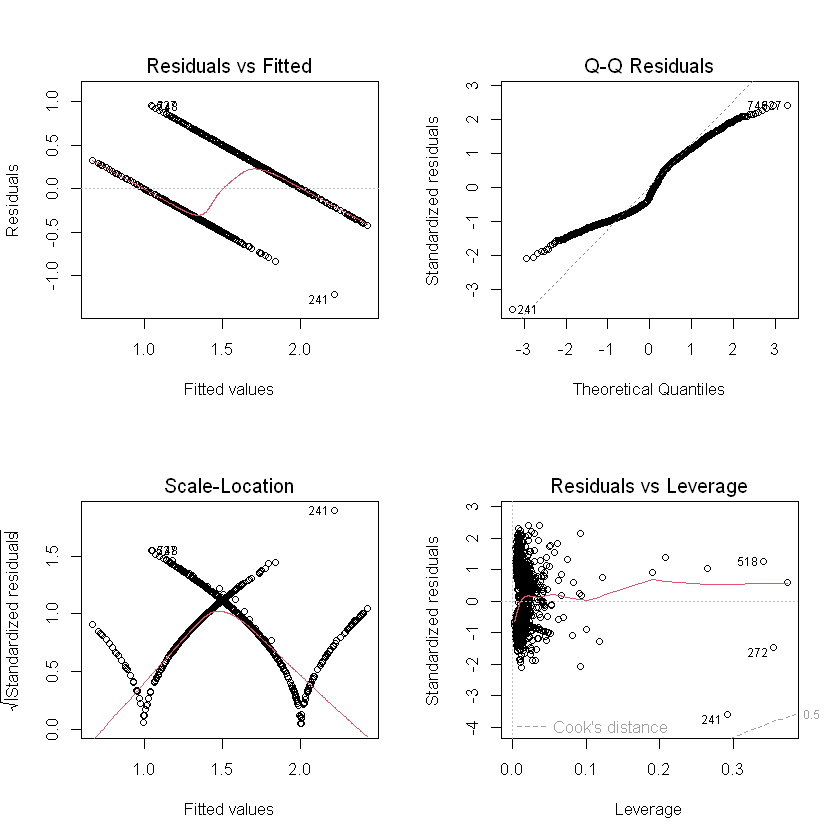

In [111]:
par(mfrow=c(2,2))
plot(fit10_1_lm)

In [112]:
og_fit10_1_lm <- lm(Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data=down_fraud_data_1)
summary(og_fit10_1_lm)


Call:
lm(formula = Class ~ . - V2 - V3 - V17 - V18 - V25 - V26, data = down_fraud_data_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11668 -0.21716 -0.08897  0.20154  0.84159 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.198e+00  2.629e-02  45.579  < 2e-16 ***
Time        -1.817e-07  2.529e-07  -0.718 0.472663    
V1          -3.848e-02  1.009e-02  -3.814 0.000146 ***
V4           9.749e-02  1.083e-02   8.999  < 2e-16 ***
V5           5.629e-03  1.091e-02   0.516 0.606029    
V6          -2.660e-02  1.298e-02  -2.050 0.040665 *  
V7           3.055e-02  1.171e-02   2.608 0.009248 ** 
V8          -1.820e-02  5.605e-03  -3.247 0.001208 ** 
V9           2.653e-02  1.022e-02   2.596 0.009572 ** 
V10         -2.764e-02  9.555e-03  -2.893 0.003910 ** 
V11         -1.293e-03  1.066e-02  -0.121 0.903530    
V12          1.273e-02  8.342e-03   1.526 0.127293    
V13         -3.411e-02  1.006e-02  -3.391 0.000726 ***
V14         -4.860e-

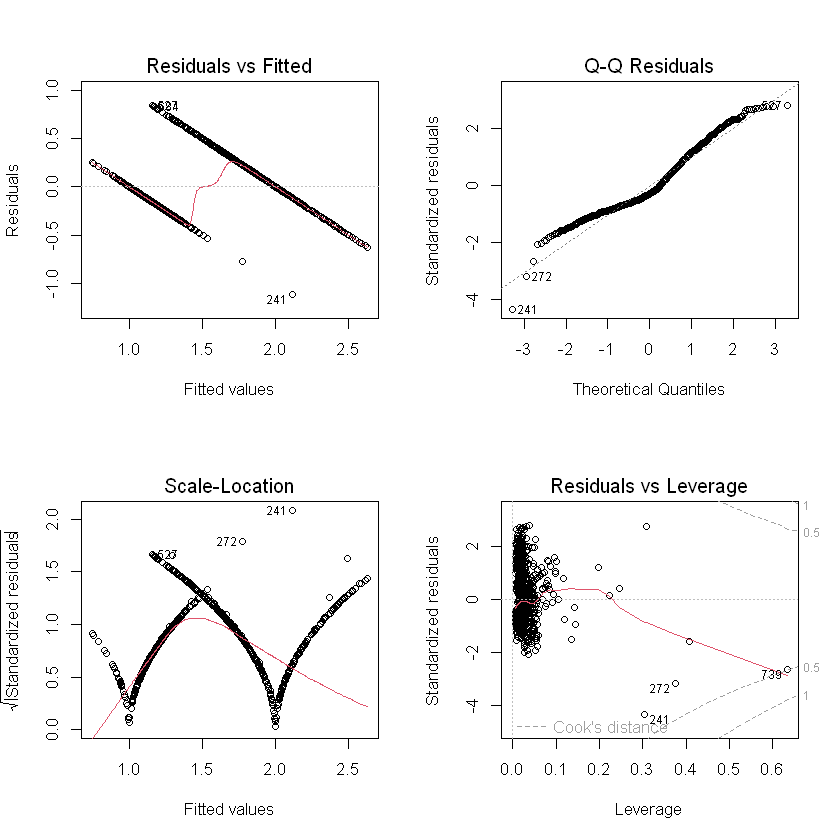

In [113]:
par(mfrow=c(2,2))
plot(og_fit10_1_lm)